# # # BHARAT INTERN
# 
# # NAME-SEELAM MADHU RATNAM
# 
# # TASK1-STOCK PREDICTION
#  - IN THIS WE WILL USE THE NSE TATA GLOBAL BEVERAGES DATASET FOR STOCK PREDICTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-tata-dataset/NSE-TATAGLOBAL.csv


# NSE-TATAGLOBAL DATASETS

# Stock Market Prediction And Forecasting Using Stacked LSTM


### To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India: Tata Global Dataset

## Import Libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import io
import requests 
import datetime

## Import Datasets

In [4]:
df = pd.read_csv('../input/new-tata-dataset/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df1 = pd.read_csv('../input/new-tata-dataset/NSE-TATAGLOBAL.csv')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Shape of data

In [6]:
df.shape

(2035, 8)

## Gathering information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

## Data Cleaning

### Total percentage of data is missing

In [10]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100

print(percentage_missing)

0.0


In [11]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


# Data Visualisation

<AxesSubplot:>

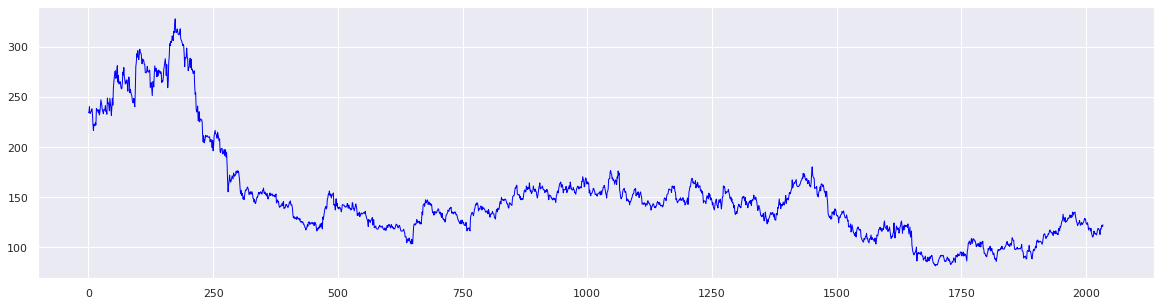

In [12]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

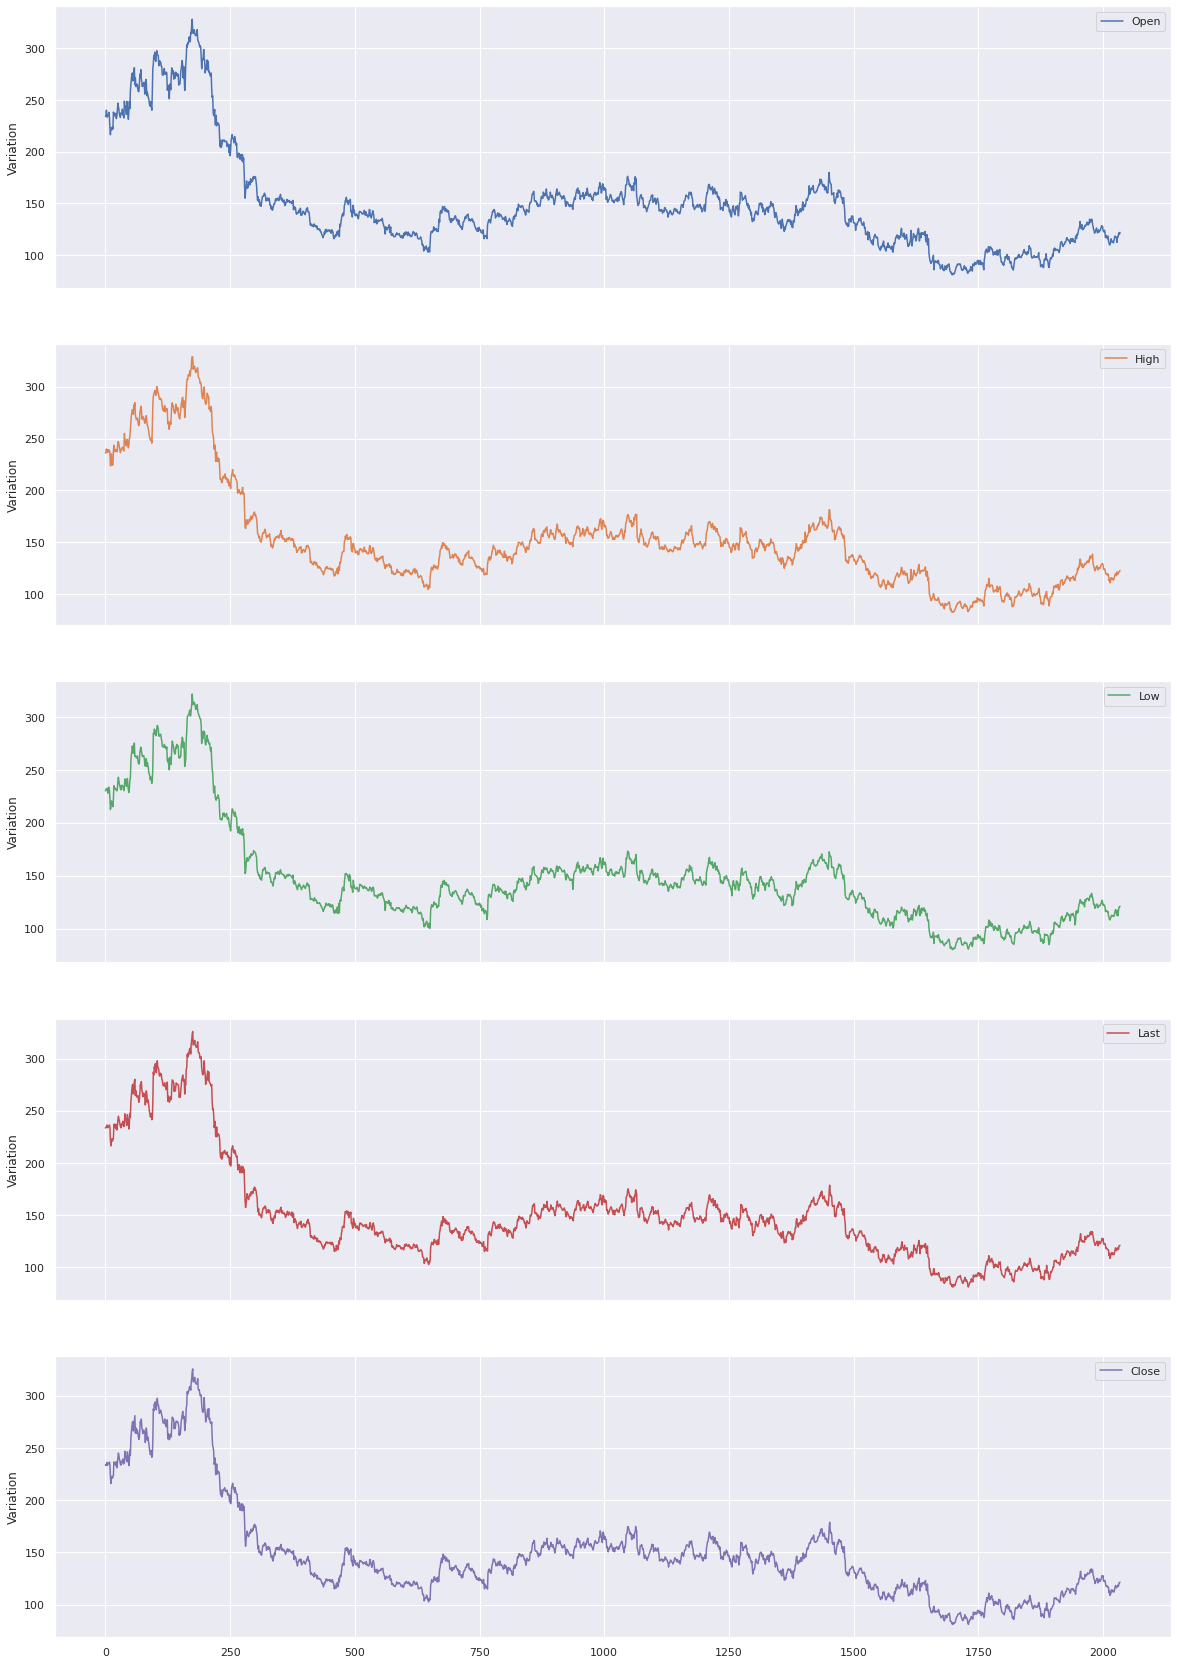

In [14]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

## Sort the dataset on date time and filter “Date” and “Open” columns

In [15]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [16]:
del df["Date"]

In [17]:
df.dtypes

Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

## 7 day rolling mean

In [18]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<AxesSubplot:xlabel='Date'>

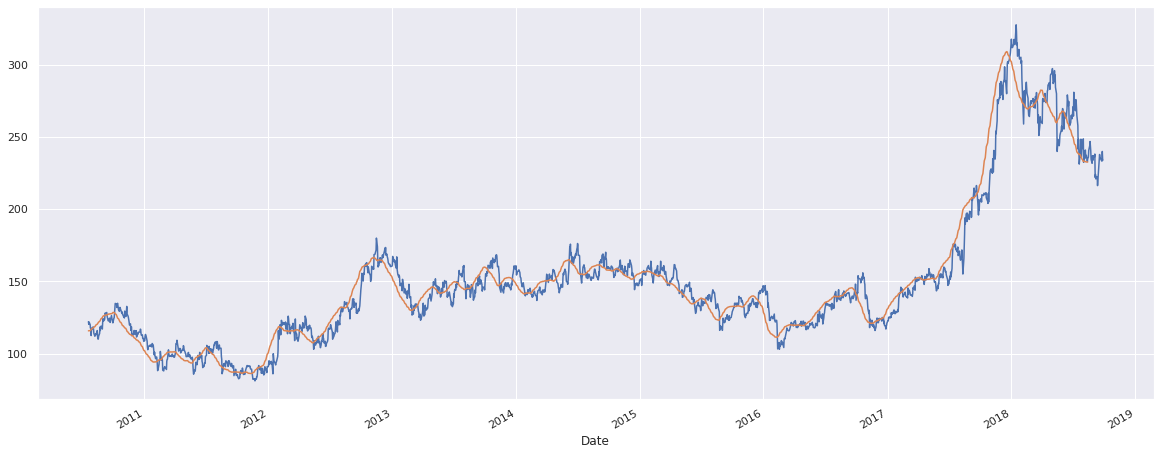

In [19]:
df['Open'].plot(figsize=(20,8),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

<AxesSubplot:xlabel='Date'>

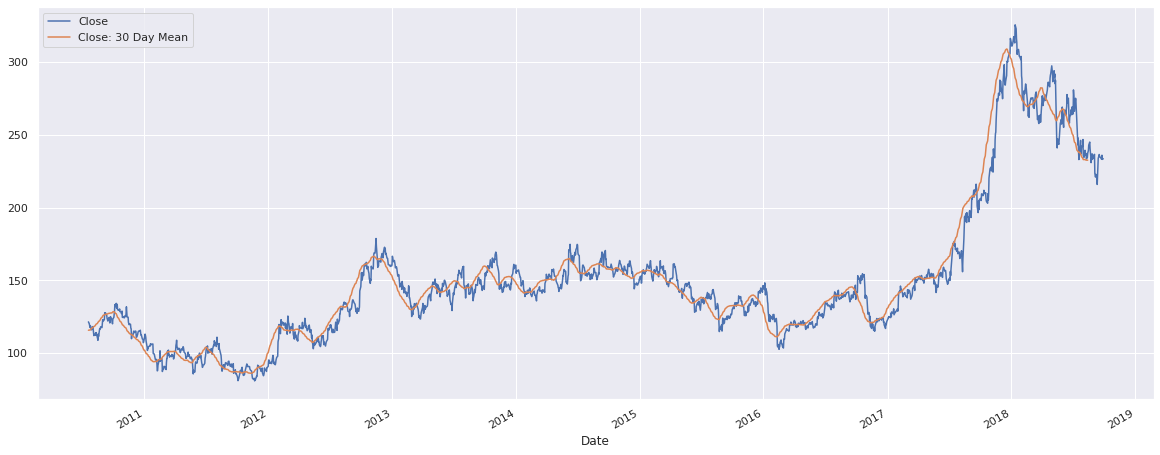

In [20]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

## Optional specify a minimum numbe2of periods

<AxesSubplot:xlabel='Date'>

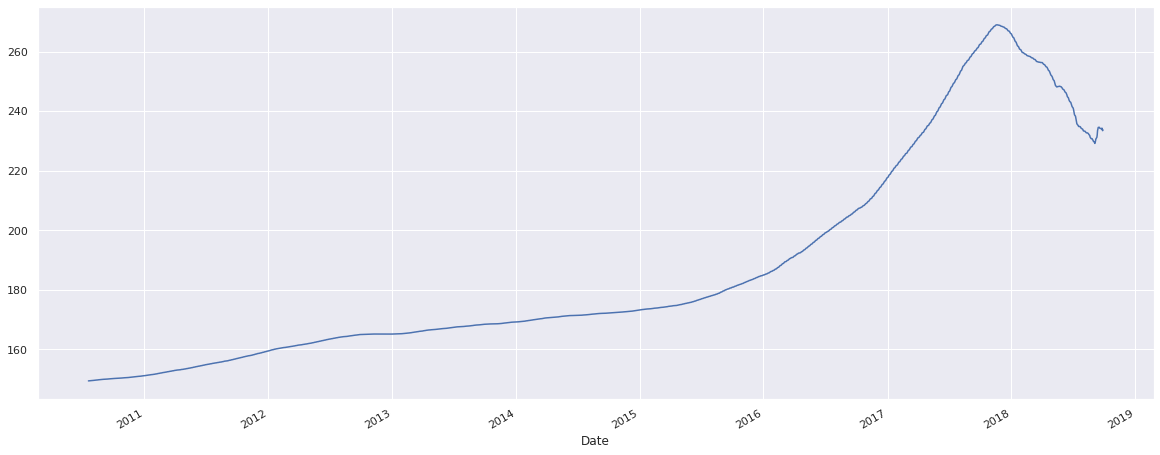

In [21]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [22]:
df2=df1.reset_index()['Open']
df2

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

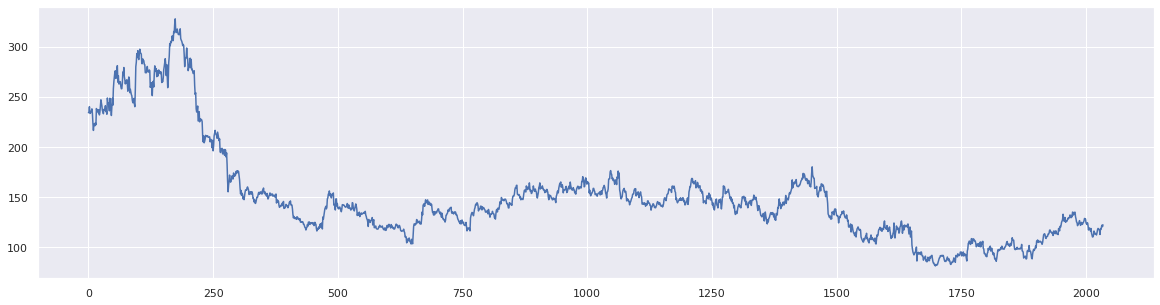

In [23]:
plt.plot(df2)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


## splitting dataset into train and test split

In [25]:
train_size=int(len(df2)*0.75)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [26]:
train_size,test_size

(1526, 509)

In [27]:
train_data,test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

## convert an array of values into a dataset matrix

In [28]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

## reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [29]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

## reshape input to be [samples, time steps, features] which is required for LSTM

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 11s 73ms/step - loss: 0.0407 - val_loss: 0.0069
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0036 - val_loss: 7.0811e-04
Epoch 3/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 9.7615e-04
Epoch 10/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0012 - val_los

In [36]:
import tensorflow as tf

## Lets Do the prediction and check performance metrics

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Calculate RMSE performance metrics

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.01071101118058

## Test Data RMSE

In [40]:
math.sqrt(mean_squared_error(ytest,test_predict))

108.10389053604372

## shift train predictions for plotting

In [41]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## shift test predictions for plotting

In [42]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## plot baseline and predictions

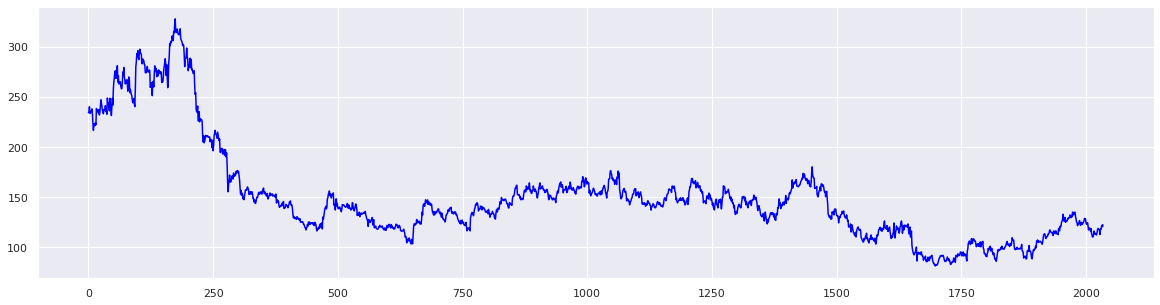

In [43]:
pred  = scaler.inverse_transform(df2)
plt.plot(pred,color='blue')
plt.show()

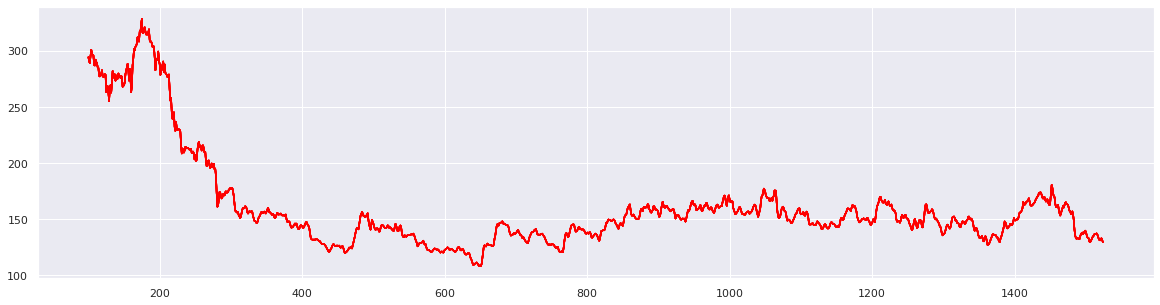

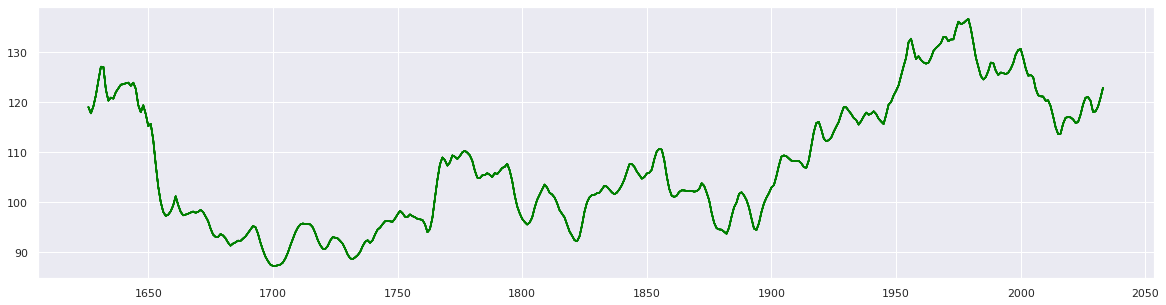

In [44]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

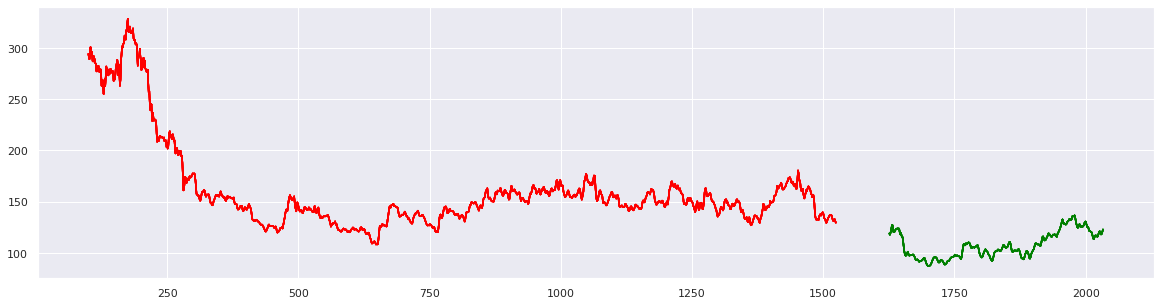

In [45]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

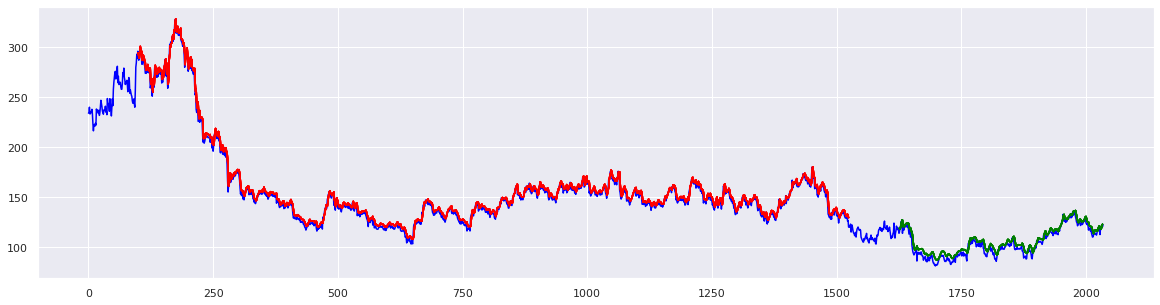

In [46]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [47]:
len(test_data)

509

In [48]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

## Save the Model

In [49]:
model.save("saved_model.h5")